In [1]:
from __future__ import print_function
import time
import os
import sys
sys.path.append('/home/rbabu/.local/lib/python3.7/site-packages/')
sys.path.append('/home/rbabu/.local/lib/python3.7/site-packages/histlite/')
sys.path.append('/home/rbabu/csky/')
import matplotlib
from matplotlib import rc
matplotlib.use('Agg')
import histlite as hl
from matplotlib import pyplot as plt
from csky.ipyconfig import *
from csky import bk, analysis, coord, dists, hyp, inj, llh, pdf, selections, trial, utils
import csky as cy
import healpy as hp
import numpy as np
%matplotlib inline
rc('text',usetex=False)
cy.plotting.mrichman_mpl(tex=False)

mp_cpus = 1
base_dir = ''  #SET THIS BASE DIR
plot_dir = cy.utils.ensure_dir('/home/rbabu/4fgl-ana/plots/analysis_props'.format(base_dir))
ana_dir = cy.utils.ensure_dir('/home/rbabu/4fgl-ana/cache')

In [2]:
repo = cy.selections.Repository()
psspec = cy.selections.PSDataSpecs.IC86v4
cspec = cy.selections.DNNCascadeDataSpecs.DNNC_10yr

Analysis Repo for masking plane

In [3]:
ana = cy.get_analysis(cy.selections.repo, 'version-004-p02', cy.selections.PSDataSpecs.IC86v4,'version-001-p01', cy.selections.DNNCascadeDataSpecs.DNNC_10yr,mask_plane=True)
ana_dir = cy.utils.ensure_dir('/home/rbabu/4fgl-ana/cache')
ana.save(ana_dir)
cy.CONF['ana'] = ana
cy.CONF['mp_cpus'] = 20
print(cy.CONF)

Setting up Analysis for:
IC86v4, DNNCascade_10yr
Setting up IC86v4...
Reading /data/ana/analyses/ps_tracks/version-004-p02/IC86_2016_MC.npy ...


Reading /data/ana/analyses/ps_tracks/version-004-p02/IC86_2011_exp.npy ...
Reading /data/ana/analyses/ps_tracks/version-004-p02/IC86_2012_exp.npy ...
Reading /data/ana/analyses/ps_tracks/version-004-p02/IC86_2013_exp.npy ...
Reading /data/ana/analyses/ps_tracks/version-004-p02/IC86_2014_exp.npy ...
Reading /data/ana/analyses/ps_tracks/version-004-p02/IC86_2015_exp.npy ...
Reading /data/ana/analyses/ps_tracks/version-004-p02/IC86_2016_exp.npy ...
Reading /data/ana/analyses/ps_tracks/version-004-p02/IC86_2017_exp.npy ...
Reading /data/ana/analyses/ps_tracks/version-004-p02/IC86_2018_exp.npy ...
Reading /data/ana/analyses/ps_tracks/version-004-p02/IC86_2019_exp.npy ...
Reading /data/ana/analyses/ps_tracks/version-004-p02/IC86_2020_exp.npy ...
Reading /data/ana/analyses/ps_tracks/version-004-p02/IC86_2021_exp.npy ...
Reading /data/ana/analyses/ps_tracks/version-004-p02/GRL/IC86_2011_exp.npy ...
Reading /data/ana/analyses/ps_tracks/version-004-p02/GRL/IC86_2012_exp.npy ...
Reading /data/ana

In [19]:
np.load('/data/ana/analyses/ps_tracks/version-004-p02/IC86_2011_exp.npy')

array([(118175,   807013, 0, 5.9234486, -0.23709394, -0.23487887, 2.3115885, 1.3346723, 55694.41990176, 4.1484404, 0.00268615),
       (118175,  1380769, 2, 3.6311877,  0.84040076,  0.74491054, 4.6196356, 2.4102492, 55694.42233634, 3.0176525, 0.00650053),
       (118175,  1617266, 0, 0.4447266,  0.18546729,  0.18440583, 1.5288749, 1.7572123, 55694.42334015, 2.7771206, 0.00836834),
       ...,
       (120155, 12977085, 0, 5.049872 ,  1.3980043 ,  0.98510855, 3.127867 , 2.969057 , 56062.4023423 , 2.6663969, 0.05405363),
       (120155, 15001918, 0, 4.31381  ,  0.6512995 ,  0.60622036, 3.9133134, 2.2215767, 56062.4110311 , 3.4194875, 0.01093756),
       (120155, 15101026, 0, 3.0823202, -0.83908874, -0.7440346 , 5.146872 , 0.7304788, 56062.41145916, 5.3306537, 0.00635942)],
      dtype=[('run', '<u4'), ('event', '<u4'), ('subevent', 'u1'), ('ra', '<f4'), ('dec', '<f4'), ('sinDec', '<f4'), ('azi', '<f4'), ('zen', '<f4'), ('time', '<f8'), ('logE', '<f4'), ('angErr', '<f4')])

In [4]:
dnncascades = np.load('/data/ana/analyses/ps_tracks/version-004-p02/IC86_2011_exp.npy')
print(dnncascades['event'])
print(dnncascades['run'])
print(dnncascades['time'])

[  807013  1380769  1617266 ... 12977085 15001918 15101026]
[118175 118175 118175 ... 120155 120155 120155]
[55694.41990176 55694.42233634 55694.42334015 ... 56062.4023423
 56062.4110311  56062.41145916]


In [4]:
old_cut=np.load('/home/rbabu/4fgl-ana/cut_tracks_inds.npy')
print(old_cut)

[   2385    2843    2985    3830    3852    4388    4471    5354    5517
    7504   10451   10531   13368   15328   21637   21671   22074   22249
   24117   24851   25094   29567   29839   32015   34111   36488   37627
   39177   39228   39309   40352   42242   47125   47430   49563   52010
   54869   56812   58320   58928   59764   61880   62512   65613   66390
   67894   68651   70825   71035   71961   74493   74835   75948   76198
   77842   78502   80431   80769   84647   84807   85256   85304   88500
   89826   93312   93983   94429   96287   98016   99050   99462  100697
  105468  107130  107460  110464  110685  110825  117217  117642  118835
  119880  119997  123729  123902  125432  129826  132049  132498  133101
  138148  138497  139847  141840  142830  143716  147272  149749  150004
  150987  152154  153765  155884  156564  159588  166665  167628  168318
  169243  170459  171835  173446  174891  175088  175131  176399  177699
  179942  181606  182026  186095  187346  188069  1

In [6]:
eventid_common=[]
cascade=[]
track=[]
cascade_list=[]
track_list=[]

index=[]
folderpath='/data/ana/analyses/dnn_cascades/version-001-p01/'
for filename in sorted(os.listdir(folderpath)):
    if filename.startswith("IC86") and filename.endswith(".npy", 3):
        print("Cascade {} file loaded".format(filename))
        cascade.append(filename)

folderpath2='/data/ana/analyses/ps_tracks/version-004-p02/'
for filename2 in sorted(os.listdir(folderpath2)):
    if filename2.startswith("IC86") and filename2.endswith("exp.npy", 3):
        print("Track {} file loaded".format(filename2))
        track.append(filename2)

dif1 = np.setdiff1d(cascade, track)
dif2 = np.setdiff1d(track, cascade)

print("Extra dataset {} found in Cascades".format(dif1))
print("Extra dataset {} found in Tracks. Removing it from Data Comparison".format(dif2))
print(np.where(track==dif2))
track = np.delete(track, np.where(track==dif2))
print(track)

Cascade IC86_2011_exp.npy file loaded
Cascade IC86_2012_exp.npy file loaded
Cascade IC86_2013_exp.npy file loaded
Cascade IC86_2014_exp.npy file loaded
Cascade IC86_2015_exp.npy file loaded
Cascade IC86_2016_exp.npy file loaded
Cascade IC86_2017_exp.npy file loaded
Cascade IC86_2018_exp.npy file loaded
Cascade IC86_2019_exp.npy file loaded
Cascade IC86_2020_exp.npy file loaded
Track IC86_2011_exp.npy file loaded
Track IC86_2012_exp.npy file loaded
Track IC86_2013_exp.npy file loaded
Track IC86_2014_exp.npy file loaded
Track IC86_2015_exp.npy file loaded
Track IC86_2016_exp.npy file loaded
Track IC86_2017_exp.npy file loaded
Track IC86_2018_exp.npy file loaded
Track IC86_2019_exp.npy file loaded
Track IC86_2020_exp.npy file loaded
Track IC86_2021_exp.npy file loaded
Extra dataset [] found in Cascades
Extra dataset ['IC86_2021_exp.npy'] found in Tracks. Removing it from Data Comparison
(array([10]),)
['IC86_2011_exp.npy' 'IC86_2012_exp.npy' 'IC86_2013_exp.npy'
 'IC86_2014_exp.npy' 'IC86_

In [8]:
l=0
ll=0
eventid_common=[]
subeventid_common=[]
temp=[]
temp2=[]
common=[]
diff=[]
diffsort=[]
print(cascade)

for i in range(len(cascade)):
    #print('/data/ana/analyses/dnn_cascades/version-001-p01/' + cascade[i])
    #print('/data/ana/analyses/ps_tracks/version-004-p02/' + track[i])
    casc=np.load('/data/ana/analyses/dnn_cascades/version-001-p01/' + cascade[i])
    c_eventid = casc['event'].tolist()
    c_subeventid = casc['subevent'].tolist()
    c_run = casc['run'].tolist()


    trac=np.load('/data/ana/analyses/ps_tracks/version-004-p02/' + track[i])
    t_eventid = trac['event'].tolist()
    t_subeventid = trac['subevent'].tolist()
    t_run = trac['run'].tolist()
    temp=[]
    l=0
    for idx_c in range(len(c_eventid)):
        c_eid = c_eventid[idx_c]
        for idx_t in range(len(t_eventid)):
            if c_eventid[idx_c]==t_eventid[idx_t] and c_subeventid[idx_c]==t_subeventid[idx_t] and c_run[idx_c]==t_run[idx_t]:
                temp2.append(t_eventid[idx_t])
                l+=1
    print("Length of common events",l)
    ll+=l

    #yy = [temp[x] for x in common]
    #diff.extend(common)
    #l+=len(common)
    #print("Length of common events", l)
print(ll)
print(len(temp2))
#diffsort= sorted(diff)
#print(len(diffsort))

['IC86_2011_exp.npy', 'IC86_2012_exp.npy', 'IC86_2013_exp.npy', 'IC86_2014_exp.npy', 'IC86_2015_exp.npy', 'IC86_2016_exp.npy', 'IC86_2017_exp.npy', 'IC86_2018_exp.npy', 'IC86_2019_exp.npy', 'IC86_2020_exp.npy']
Length of common events 80
Length of common events 73
Length of common events 59
Length of common events 85
Length of common events 66
Length of common events 60
Length of common events 83
Length of common events 68
Length of common events 54
Length of common events 75
703
703


In [9]:
np.save("Track_cut_event", temp2)

In [5]:
ana2=ana

In [6]:
ana=ana2

In [4]:
new_cut=np.load("Track_cut_event.npy")

In [ ]:
idx=[]
print(ana[0].data['event'])
print(len(ana[0].data['event']))
for i in range(len(ana[0].data['event'])):
    if ana[0].data['event'][i] in new_cut:
        idx.append(i)
        print(i)
np.save("Track_cut_index", idx)

In [5]:
new_depend=np.load("Track_cut_event.npy")

In [12]:
data=np.load("/home/rbabu/4fgl-ana/Fermi-LAT_pi0_map.npy")
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)

array([0.07749345, 0.07602808, 0.06746177, ..., 0.04811129, 0.04801676,
       0.05311572])

In [6]:
ana[0].data=cy.utils.Arrays(ana[0].data.as_dataframe.drop(labels=new_cut))

KeyError: '[35262629, 76850850, 77475614, 8818220, 30680497, 74858693, 48193216, 65000538, 20951520, 25389554, 41600863, 15887241, 31985689, 12670589, 68222623, 21402738, 61658729, 26069845, 65202303, 19247492, 25367362, 71578833, 35470869, 22720745, 45146187, 42840323, 44090416, 14683586, 51526392, 36907716, 12616239, 62511041, 42179693, 8661875, 37617364, 17660988, 75345103, 22067570, 33679564, 28770343, 76428834, 37689751, 45225481, 55183459, 2134971, 7473769, 41621628, 58743592, 38257564, 69907754, 53075760, 45142134, 9726138, 6461905, 22506680, 23008082, 10337793, 3076730, 24530774, 86690003, 37516330, 79557282, 55091504, 72972762, 82911426, 14044930, 79354608, 35648443, 59261154, 13408144, 65583859, 58470055, 42810540, 23692699, 35803942, 25891329, 59493855, 38472545, 60939370, 68239119, 70425238, 24639840, 47157127, 65993177, 12723008, 63678320, 42206482, 52858852, 49164343, 57898113, 17201996, 7420190, 22178661, 47160860, 14705860, 14839933, 68381610, 29644263, 4878014, 45203778, 25733796, 62228333, 54167408, 59017361, 22327808, 10133123, 65799983, 67765848, 41134777, 69582282, 21045242, 18840363, 82721290, 37058180, 51231747, 5179817, 24694818, 82473111, 24663067, 23915837, 12088209, 13419608, 62205447, 60498154, 39025703, 69481836, 48445607, 15834717, 59211167, 3101492, 60793093, 9263635, 15683398, 47781403, 48687198, 6130855, 48437940, 8881258, 54552368, 19242627, 15109623, 57192015, 59298950, 45159719, 21580997, 8843530, 45362017, 52838215, 39071909, 16939975, 36426478, 47763661, 63165779, 58528051, 67470257, 22427897, 14925654, 58341179, 56290919, 32647624, 35895415, 4596581, 14230771, 5875817, 21737796, 71635885, 59083579, 21103862, 24567609, 16437313, 56465916, 71206790, 37533734, 17643711, 28558117, 73680041, 75727741, 41397713, 60464441, 77391892, 30609821, 67428303, 66217028, 28893601, 47440413, 30318802, 10248648, 18813016, 66514313, 61805424, 19457142, 62777378, 29215673, 27052072, 72499995, 69520949, 74407354, 62379601, 14238616, 31643146, 61271339, 37287736, 32059713, 49004749, 35820881, 14058259, 11756877, 10249268, 73448145, 48516466, 50762618, 21090826, 31597886, 63660833, 29763975, 36293004, 46251116, 18451077, 23054028, 69985862, 54841859, 49993914, 32769389, 22275797, 33242448, 14669567, 27666016, 19744163, 71556679, 53018589, 68897329, 13508166, 46860097, 7673410, 72860192, 23587517, 23213086, 33704130, 9626159, 46025570, 30426100, 75029561, 17782498, 45436272, 38714596, 49574591, 71671489, 17876546, 75869578, 40218838, 6997968, 44314116, 74949046, 62654974, 5828397, 47446028, 46887683, 51346356, 83475286, 31241973, 10909619, 4676481, 25379411, 53456184, 19143140, 65301507, 24550325, 41951181, 63858884, 55697004, 77356751, 59818699, 27907531, 34086848, 79598760, 42764072, 76931534, 10187991, 67078561, 24850618, 41290513, 25394551, 52328799, 25622249, 17561346, 42823176, 1480179, 52563099, 35856269, 22896160, 60800092, 6069913, 7994616, 9457662, 68852438, 62548107, 24093423, 44603413, 48329646, 19238587, 41529236, 52831354, 70774321, 46604576, 66086128, 47870257, 56584510, 52416710, 1623335, 48266369, 28053636, 53550679, 14960969, 29218006, 66710856, 64703697, 28324982, 75524572, 54121446, 27231201, 17138006, 35957132, 36099511, 30290386, 33076546, 63223163, 51027948, 3568198, 70365400, 46519254, 46742177, 81824611, 53053445, 56070779, 53652526, 65694119, 68578883, 2680339, 20790632, 58189663, 23988269, 64844442, 20279836, 10950725, 6941756, 30341844, 77913846, 15786828, 1495014, 34779939, 49022899, 36304276, 42238303, 27424557, 3678482, 35708012, 41339160, 63039891, 6875189, 60001661, 5474063, 22500592, 9976746, 41854179, 33245448, 61140048, 60619271, 65818002, 72762671, 26547572, 6690853, 51640009, 60963383, 73497112, 57153424, 15439914, 38863990, 55833882, 10460957, 8195716, 59980082, 49204818, 75696976, 20058760, 27633828, 54403437, 66542084, 10586290, 13951662, 37667020, 46119602, 82194976, 33898374, 37969272, 42290951, 43221896, 29631278, 8369743, 56225256, 50642155, 40432280, 61877219, 7232010, 73789798, 48745334, 41135227, 29265358, 73772329, 55217761, 56750375, 38829256, 43044084, 69999953, 25422499, 50151524, 70042146, 59671329, 23328689, 35145065, 19424541, 65632682, 54384526, 44137239, 22914918, 32619524, 68591895, 14404997, 42780490, 41328275, 17699546, 8901965, 59770626, 23095483, 13436196, 60696679, 37645013, 8891301, 40022561, 35830953, 43700806, 14416815, 30330918, 49338663, 34395850, 30416466, 29697828, 47724112, 68731203, 77090840, 68772388, 27981453, 46483636, 14372616, 1890302, 68320135, 51193544, 64132389, 77796652, 24736390, 53816400, 14554765, 65787411, 28291279, 84363835, 73414285, 59416850, 56643045, 5815803, 30161438, 10726155, 30590656, 30275325, 44530914, 24977193, 4293118, 80862133, 32999481, 25994132, 10314635, 29263738, 37613010, 63156827, 70149739, 13718525, 48850114, 35706074, 15073407, 27619363, 4723479, 73931216, 42535353, 29910265, 36249688, 67295416, 44554474, 26248174, 34615280, 52210961, 29732966, 32289889, 70870544, 39798251, 56836961, 70157432, 36945361, 45907027, 60982184, 63643241, 27648242, 53463083, 26619122, 70146547, 47604008, 44954511, 10226757, 17994761, 14684829, 80926380, 22237779, 2274312, 74601119, 35084856, 18559065, 25245737, 61961467, 35559660, 9414128, 9705973, 68579592, 83451308, 32347581, 15156286, 54525949, 48070216, 82447399, 51415872, 50048735, 54350484, 79892760, 13259495, 37573016, 45783394, 26466081, 68374019, 68335054, 36570388, 18550227, 9163776, 13640876, 18947370, 44836801, 25333618, 69915272, 18843224, 42756510, 59365682, 70920126, 33082746, 17039650, 59148196, 25980319, 26044832, 31419440, 69057768, 49080007, 47437465, 21580080, 68509818, 68044500, 34868318, 72142351, 9601990, 58519843, 54078017, 37823320, 43782760, 62484706, 13594592, 13387271, 3991550, 15132511, 65003736, 26506158, 12093070, 41871458, 8890654, 27314214, 79561074, 73200429, 12918380, 44746561, 34976959, 15080243, 76944306, 19770798, 3839366, 9870317, 42642292, 61916628, 4109681, 6812154, 38146245, 59984485, 4173541, 50780304, 66115700, 32354276, 76376513, 62906666, 1786692, 8246321, 21428992, 6792078, 6147617, 37326222, 65366884, 22856130, 22616840, 5758738, 44372554, 10291363, 5340522, 4909414, 62626508, 3896930, 67158030, 37249971, 4976960, 70735859, 70527242, 54687590, 11635085, 6867177, 21421655, 19765889, 11134114, 47519443, 38703302, 61887522, 18077750, 39607495, 28021653, 66159920, 26714961, 51027940, 40959796, 49656604, 11468513, 27724853, 25221114, 46119241, 33560400, 65584324, 70408922, 48742566, 18329838, 28140513, 18016075, 13320369, 24892468, 28669321, 65928808, 82271997, 28878376, 42180446, 73768324, 57537551, 54528962, 61467857, 76873135, 7045243, 76248257, 27017010, 22823218, 3808198, 11667022, 49277905, 49184059, 38162069, 3750808, 49290549, 3963717, 55374203, 55345666, 56652541, 49877960, 51886252, 51267004, 13317201, 49113161] not found in axis'

In [28]:
ana[0].data=cy.utils.Arrays(ana[0].data.as_dataframe.drop(labels=old_cut))

In [25]:
data=np.load("/data/ana/analyses/NuSources/2021_DNNCascade_analyses/templates/KRA-gamma_5PeV_maps_energies.tuple.npy", allow_pickle=True)
print(data)
print(data.ndim)

: 

In [29]:
print(ana)

Analysis(keys=[IC86v4, DNNCascade_10yr])


In [18]:
from pandas import *
srcname=[]
srcl=[]
srcb=[]
c_srcname=[]
c_srcl=[]
c_srcb=[]
srctable=read_csv("sourcetable.csv",on_bad_lines='skip')
conf_srctable=read_csv("confirmedsourcetable.csv",on_bad_lines='skip')
#print(srctable.duplicated(keep='last'))  ##Check to see if there are duplicated lines
#print(srctable.columns.tolist())
#print(conf_srctable.columns.tolist())
srcname=srctable['4FGLName'].tolist()
srcl=srctable['GLON'].tolist()
srcb=srctable['GLAT'].tolist()

c_srcname=conf_srctable['4FGLName'].tolist()
i-0
#print(srcname)
print(len(srcname))
print(len(c_srcname))
for i in range(len(c_srcname)):

    for j in range(len(srcname)):

        if c_srcname[i].replace('4FGL ', '')==srcname[j].replace('4FGL ', ''):
            i+=1
            print("Source1= {}, Source2= {}".format(c_srcname[i].replace('4FGL ', ''),srcname[j]).replace('4FGL ', ''))
            #print(srcl[j])
            #c_srcl.append(srcl[j])
            #print(c_srcl)
            #c_srcb[i]=srcb[j]
#print(i)
#print(len(c_srcl))



423
56
Source1= J0240.5+6113, Source2= J0222.4+6156e
Source1= J0330.7+5845, Source2= J0240.5+6113
Source1= J0340.4+5302, Source2= J0330.7+5845
Source1= J0426.5+5434, Source2= J0340.4+5302
Source1= J0500.3+4639e, Source2= J0426.5+5434
Source1= J0540.3+2756e, Source2= J0500.3+4639e
Source1= J0609.0+2006, Source2= J0540.3+2756e
Source1= J0617.2+2234e, Source2= J0609.0+2006
Source1= J0620.4+1445, Source2= J0617.2+2234e
Source1= J0634.2+0436e, Source2= J0620.4+1445
Source1= J0639.4+0655e, Source2= J0634.2+0436e
Source1= J0709.1−1034, Source2= J0639.4+0655e
Source1= J0844.1−4330, Source2= J0709.1−1034
Source1= J0850.8−4239, Source2= J0844.1−4330
Source1= J0904.7−4908c, Source2= J0850.8−4239
Source1= J1008.1−5706c, Source2= J0904.7−4908c
Source1= J1018.9−5856, Source2= J1008.1−5706c
Source1= J1045.1−5940, Source2= J1018.9−5856
Source1= J1351.6−6142, Source2= J1045.1−5940
Source1= J1358.3−6026, Source2= J1351.6−6142
Source1= J1405.1−6119, Source2= J1358.3−6026
Source1= J1442.2−6005, Source2= J

-1.6057029118347832 -0.4886921905584123


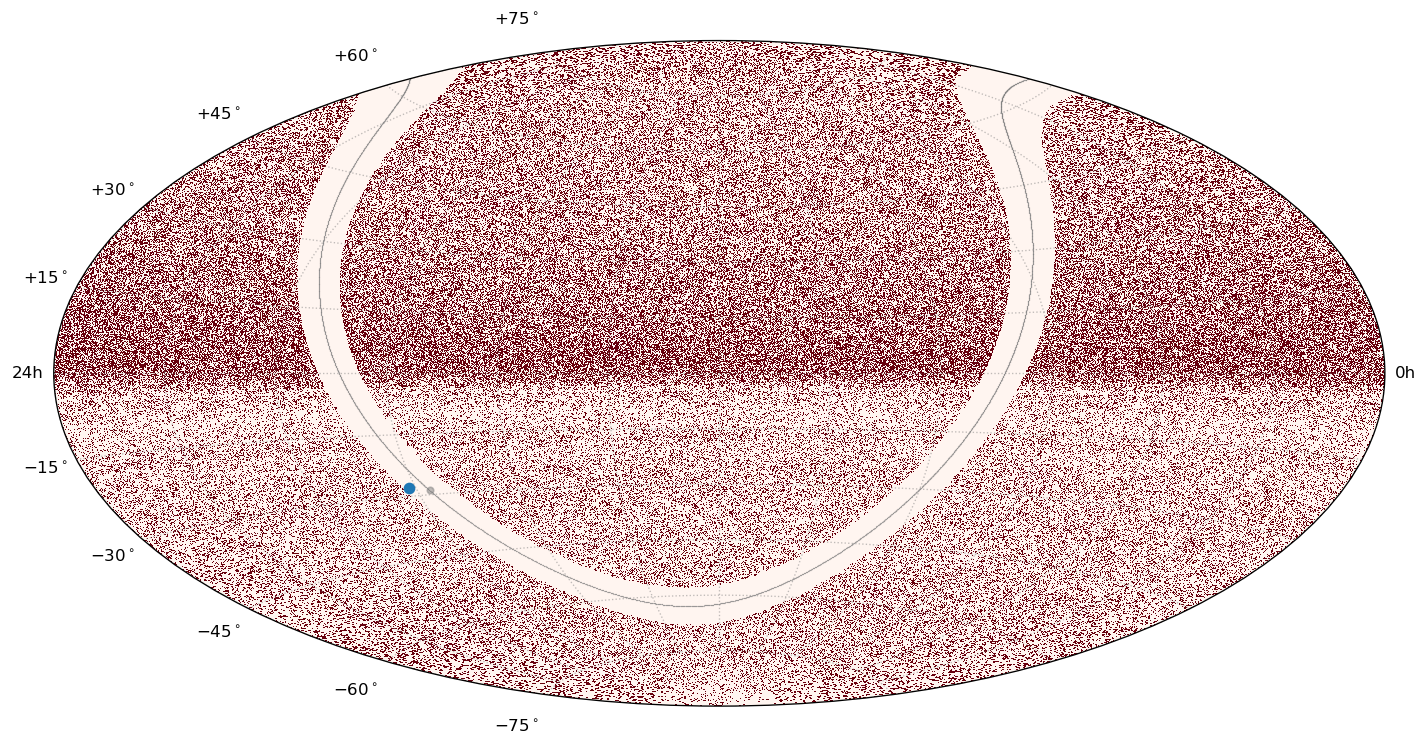

In [20]:
import histlite.heal as heal
from astropy.coordinates import SkyCoord
import astropy.units as u
import math
a = ana['IC86v4']
bg_data, data = a.bg_data, a.data
bg_map = heal.hist(512, bg_data.dec, bg_data.ra)

#fig, ax = plt.subplots (subplot_kw=dict (projection='aitoff'))
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1, projection='aitoff')
sp = cy.plotting.SkyPlotter(pc_kw=dict(cmap='milagro', vmin=0,vmax=1))
mesh, cb = sp.plot_map(ax, bg_map.map, n_ticks=2, pc_kw={'cmap':'Reds'})
c_gal = SkyCoord(268, -28, unit=u.deg, frame='fk5')
l_rad =c_gal.ra.wrap_at(180 * u.deg).radian
#if l_rad > np.pi:
#    l_rad-= 2. * np.pi
b_rad = c_gal.dec.radian
print(l_rad, b_rad)
#c = ax.scatter(l_rad, b_rad)
c = ax.scatter(l_rad, b_rad)
kw = dict(color='.5', alpha=.5)
sp.plot_gp(ax, lw=.5, **kw)
sp.plot_gc(ax, **kw)
cb.set_label ('Events')
cb.remove() 

ax.grid(**kw)
plt.tight_layout()
plt.savefig('masked_sky_nosources.png'.format(plot_dir),bbox_inches='tight')

In [21]:
import healpy
def thetaphi_to_mpl(theta, phi):
    theta, phi = np.atleast_1d(theta), np.atleast_1d(phi)
    x = np.pi - phi
    x[x > np.pi] -= 2*np.pi
    y = np.pi/2 - theta
    return x, y
def plot_gc(self, ax, color='.5', s=15, **kw):
    l = 0
    theta_b = np.pi/2
    if self.coord == 'C':
        r = healpy.Rotator(coord='GC')
        theta, phi = r(theta_b, l)
    elif self.coord == 'G':
        theta, phi = theta_b, l
    else:
        raise ValueError('bad coord {}'.format(self.coord))
    x, y = self.thetaphi_to_mpl(theta, phi)
    ax.scatter(x, y, color=color, s=s, **kw)

[-1.50805167] [-0.50503148]
273d28m13.80515899s -17d39m42.94393468s
-1.6313680034968363 -0.3082588110475357


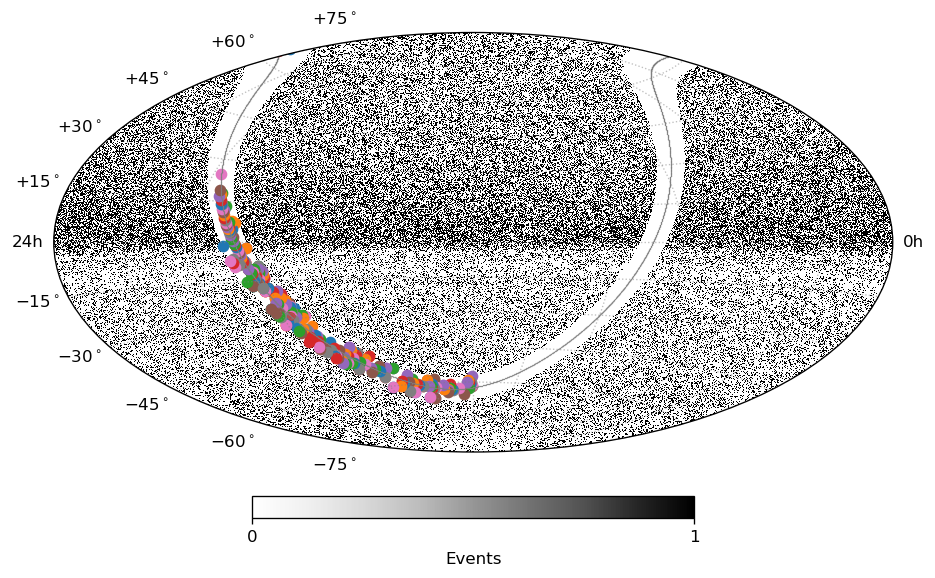

In [22]:
import histlite.heal as heal
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.coordinates import Angle
import math
a = ana['IC86v4']
bg_data, data = a.bg_data, a.data
bg_map = heal.hist(512, bg_data.dec, bg_data.ra)

#fig, ax = plt.subplots (subplot_kw=dict (projection='aitoff'))
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1, projection='aitoff')
sp = cy.plotting.SkyPlotter(pc_kw=dict(cmap='Greys', vmin=0,vmax=1))
mesh, cb = sp.plot_map(ax, bg_map.map, n_ticks=2)
for i in range(len(srcname)):
    c_gal = SkyCoord(srcl[i], srcb[i], unit=u.deg, frame='galactic')
    c_icrs=c_gal.icrs
    l_rad = c_icrs.ra.radian
    l_rad =-(np.pi +c_icrs.ra.wrap_at(180 * u.deg).radian)
    b_rad = c_icrs.dec.radian
    c = ax.scatter(l_rad, b_rad)
l = 0
theta_b = np.pi/2
theta, phi = theta_b, l
r = healpy.Rotator(coord='GC')
theta, phi = r(theta_b, l)
x, y = thetaphi_to_mpl(theta, phi)
print(x,y)
ax.scatter(x, y, color='red', s=15)


gc_cel = SkyCoord(13,0, unit=u.deg, frame='galactic')
gc_gal = gc_cel.icrs
print(gc_gal.ra, gc_gal.dec)
lc_rad = -(np.pi + gc_gal.ra.wrap_at(180 * u.deg).radian)
bc_rad =gc_gal.dec.radian
print(lc_rad, bc_rad)
c = ax.scatter(lc_rad, bc_rad)
kw = dict(color='.5', alpha=.5)
sp.plot_gp(ax, lw=0.5, **kw)
sp.plot_gc(ax, **kw)
cb.set_label ('Events')

ax.grid(**kw)
plt.tight_layout()
plt.savefig('masked_sky.png'.format(plot_dir),bbox_inches='tight')